# **Exploratory Data Analysis**

Exploratory Data Analysis refers to the critical process of performing initial investigations on data to discover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations. It is good to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand, before getting them dirty with it.
Most of the time to Understand the Data and Intuition about the data.EDA is the Heart of the Machine Learning

Haberman's contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In this DataSet, Analyze How Many patients are Survive More than Five Year after surgery, How many Patients are surviving less than five year, Let's Start with our Analysis


# Import Usable Library and Load the Dataset

In [2]:
#import the necessary Library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 
 

In [3]:
# read the Csv File store into the variable
haberman_dataframe = pd.read_csv("haberman.csv")
print(haberman_dataframe.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


# Observation


1,From this Dataset totally Four features are present(Age, year,nodes and status)


2.Age,Year,nodes are Independent feature, Feature Status is Dependent feature (or) target feature (or) output feature

In [4]:
print("Shape of the Given Data Set : {} ".format(haberman_dataframe.shape))
print("Size Of the Dataset:{0}".format(haberman_dataframe.size))

Shape of the Given Data Set : (306, 4) 
Size Of the Dataset:1224


# Observation 

This Dataset Contains  306 patients details, Each Patient have a details like Age,year of operation ,No of lymph nodes and survival status

In [7]:
haberman_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


# Observation

1.This Dataset Contains No Missing Value

2.All the Columns have Integer

3.All the Feature contains 306 data points 


In [8]:
haberman_dataframe.groupby(['status']).count().T

status,1,2
age,225,81
year,225,81
nodes,225,81


In [9]:
haberman_dataframe.status.value_counts()

1    225
2     81
Name: status, dtype: int64

# Observation

1.Out Of 306 Patients  225 patients has Survived More than Five Years and Only 81 patients Survived Less then Five Year 

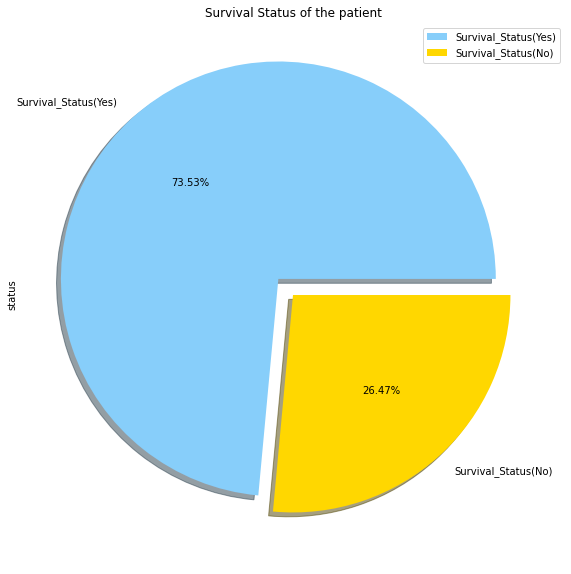

In [10]:
plt.figure(figsize=(10,10))
plt.title("Survival Status of the patient")
labels = ["Survival_Status(Yes)" ,"Survival_Status(No)"]
colors = ["lightskyblue" ,"gold"]
haberman_dataframe.status.value_counts().plot.pie(explode = [0.1,0], autopct = '%0.2f%%',shadow = True,labels = labels ,colors = colors)
plt.legend(labels , loc = "upper right")
plt.show()


# Observation

The Feature Status is an Dependent Variable (or) Target Variable,The Status Feature Contains Two Classes(Class 1 and Class2)
1 means The Patieny has Survived More than Five Years,2 means the Patient has Survived less than Five Year

1.Out of 306 Patients 74% of Patient has Survived More than Five Year 

2.Only 26% of Patient Survived Less than Five Year

We conclude the Dataset is Purely Imbalanced

In [11]:
#description about the dataset
haberman_dataframe.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Observation 

Describe function shows the Basic Satistical View for Whole DataSet

1.Age of the Patient lies between 30 to 83

2.Maximum number of positive axillary nodes observed is 52

3.75% of the patients have affected  less than 5 positive axillary nodes and  25% of patients have no positive axillary nodes

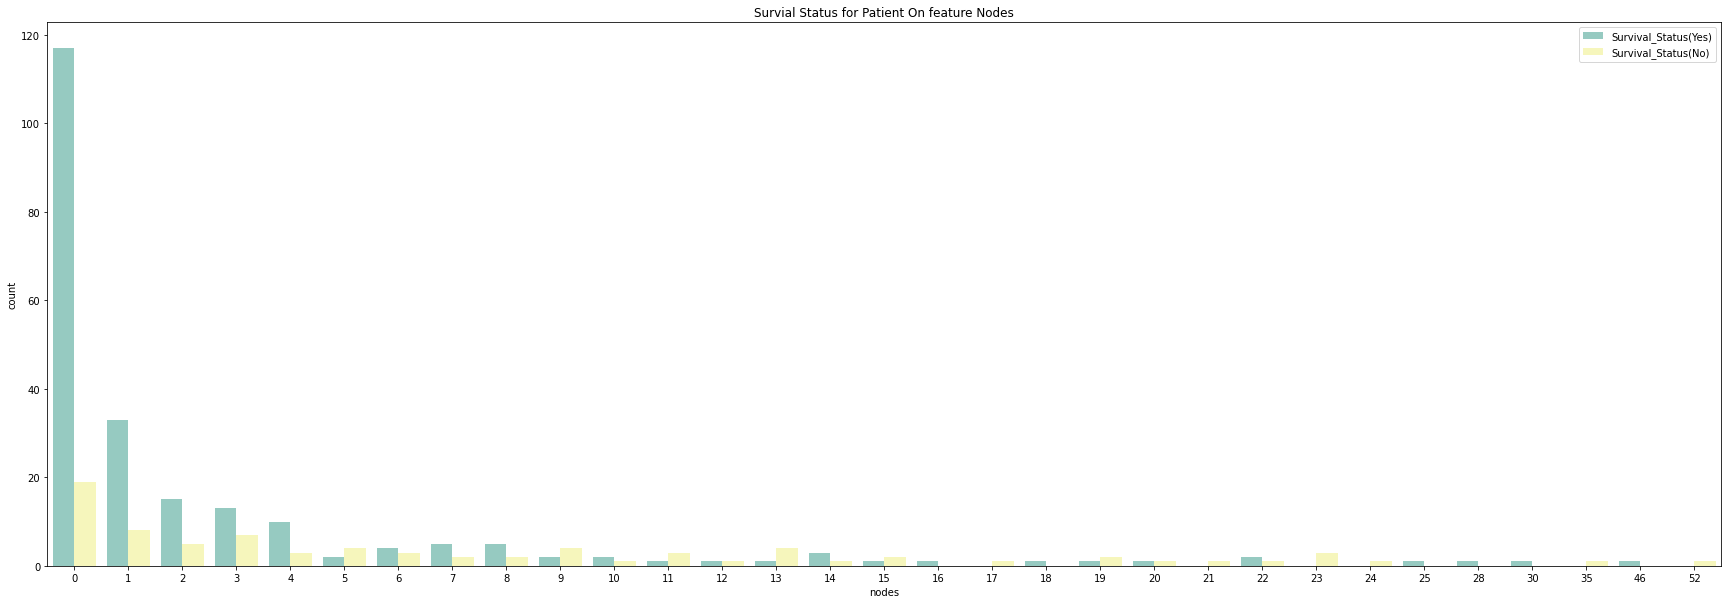

In [12]:
plt.figure(figsize=(30,10))
sns.countplot(x = 'nodes',hue = 'status',data = haberman_dataframe,palette='Set3')
plt.title('Survial Status for Patient On feature Nodes')
plt.legend(labels , loc = "upper right")

# Observation

1.The Patient has survived as More has not Affected No Positive Auxillary Node

<Figure size 720x1080 with 0 Axes>

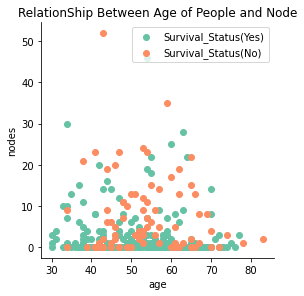

In [13]:
plt.figure(figsize= (10,15))
sns.FacetGrid(haberman_dataframe, hue="status", size=4,palette='Set2') .map(plt.scatter, "age", "nodes")
plt.legend(labels , loc = 'upper right')
plt.title("RelationShip Between Age of People and Node")
plt.show();

# Observation
1.The Green Point Represents the Patient survived More than Five Years 

2.Orange Points Represents the patient Survived, Less, then Five Years 

We Observe Patients Whose Survived  More in the Age between  (40 to 60) have affected No Positive Lymph Node. We can See only One Patient has Affected 50 Positive lymph nodes not Survived less than five year

Text(0.5, 1.0, 'Distribution of Age')

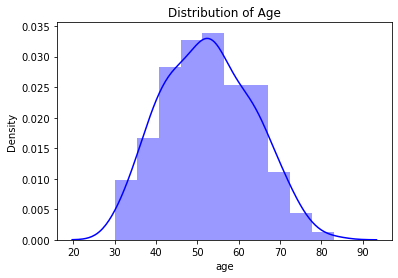

In [14]:
#Let's See the Distribution of the Age

sns.distplot(haberman_dataframe["age"],bins = 10 ,color = 'blue')
plt.title('Distribution of Age')

# Observation
The Age of Patient Lies in the range Between 30 to 83.More No of Spread in the range 45 to 65

In [15]:
def distplot(data,column):
    sns.FacetGrid(data, hue="status", size=5) \
     .map(sns.distplot, column) 
    plt.legend(labels, loc = 'upper right')
    plt.show();

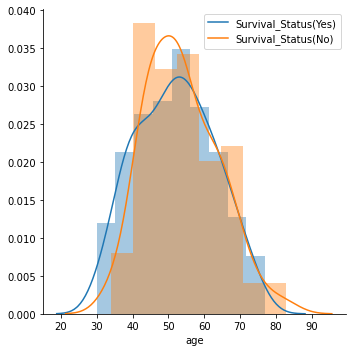

In [16]:
#distibution of Age with o/p feature
distplot(haberman_dataframe,'age')


# Observation

1.This Distribtion Says the Patient Whose Survived in the Age between 30 to 75,More No of Patients has Survived between 45 to 55

2.Patient Died in the Age Between 35 to 85 

3.There is More Overlapping Between the Ages Of Status, We cannot decide the survival chances of a patient just by considering the age parameter

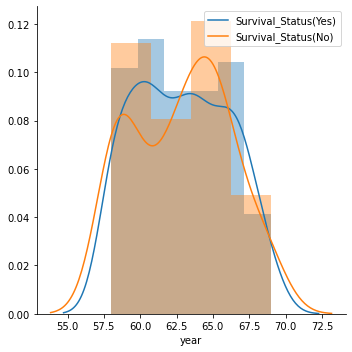

In [18]:
#distribution of year with survival status
distplot(haberman_dataframe,'year')

# Observation
 There is Major Overlapping for the Year of Successful operation/unSuccessful Operation,we observed that in the years 1958 and 1967 there were more unsuccessful operations.

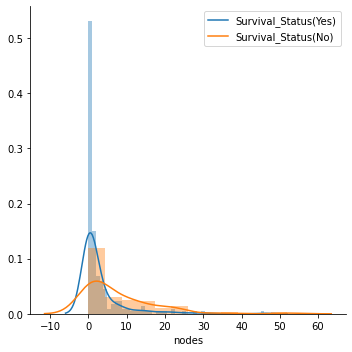

In [19]:
distplot(haberman_dataframe,'nodes')

# Observation

1.The Patient who Survives More has a chance of No Axillary Node or less than 5 Auxillary Nodes, Only a Few patients survive affected Auxillary Node like 15 and 20

2.Out of 81 patients 10% of patients  affected a 0-6 auxiliary Node,we Literally say there is a chance a has affected a five or less axillary Node survival status is low

# Probability Density Function and Cummulative Density Function

In [32]:
def pdfAndCdf(data,column):
    
    counts, bin_edges = np.histogram(data[column] , bins = 10 ,density = True)
    print(counts)
    pdf = counts/(sum(counts))
    print(pdf);
    print(bin_edges);
  #compute the cummulative sum 
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,label = "PDF")
    plt.plot(bin_edges[1:], cdf, label = "CDF")
    title = "PDF and CDF Of Feature: {0}".format(column)
    plt.title(title)
    plt.legend(loc = 'upper left')
    plt.show()

[0.00986558 0.01664817 0.02836355 0.03267974 0.03391294 0.02528055
 0.02528055 0.01109878 0.00431619 0.0012332 ]
[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


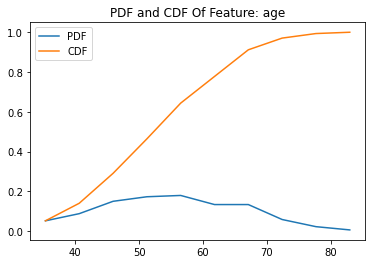

In [33]:
pdfAndCdf(haberman_dataframe,'age')

# Observation
1.90% patient has Age less than 68,only 10% patient has age greater than 68

[0.14831574 0.0188537  0.01131222 0.00502765 0.00565611 0.00125691
 0.00062846 0.         0.00062846 0.00062846]
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


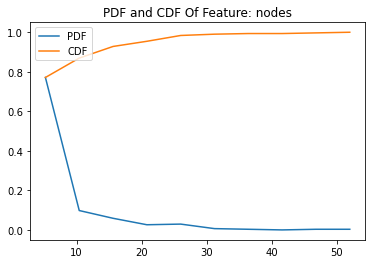

In [34]:
pdfAndCdf(haberman_dataframe,'nodes')

 We can Observe From the Plot 80 percent of patient has less Auxillary_node 

In [38]:
#plot Probability Density Function and CDF with Class Label

def PDFandCDFWithClassLabel(data,column):

      #survived class label data
    survived = data.loc[data['status'] == 1 , :]
      #non-survived
    non_survived = data.loc[data['status'] == 2, : ]


  #plot for suvived staus 
    count, bin_edges = np.histogram(survived[column] , bins = 10, density = True)

    pdf = count/sum(count)

    print("PDF of Survival Status with feature {1} is : {0}".format(pdf , column))

    print("=" * 100)

  #comput cdf

    cdf = np.cumsum(pdf)
    print("Cumulativ Sum for Survived People with feature {1} : {0}".format(cdf,column))

    plt.plot(bin_edges[1:],pdf,color ='green')
    plt.plot(bin_edges[1:] , cdf,color='red')

    print("=" * 100)

    count, bin_edges = np.histogram(non_survived[column] , bins = 10, density = True)

    pdf = count/sum(count)

    print("PDFfor non-survival People with feature {1}  : {0}".format(pdf,column))

      #comput cdf
    print("=" * 100)

    cdf = np.cumsum(pdf)
    print("Cumulativ Sum for Non Survived People with feature {1}: {0}".format(cdf,column))

    print("=" * 100)
    plt.plot(bin_edges[1:],pdf,color='blue')
    plt.plot(bin_edges[1:] , cdf,color='orange')

    title = "PDF and CDF of Survival and Non Survival Status With feature {0}".format(column)

    plt.legend(['PDF OF Survival Status', 'CDF of Survival Status', 'PDF of NON Survival Status', 'CDF Of Non Survival Status'])
    plt.xlabel(column)
    plt.ylabel("Probility Status")
    plt.title(title)

    plt.show()



  

PDF of Survival Status with feature age is : [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Cumulativ Sum for Survived People with feature age : [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
PDFfor non-survival People with feature age  : [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
Cumulativ Sum for Non Survived People with feature age: [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


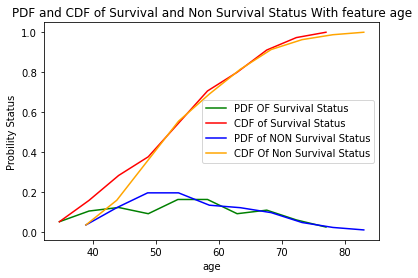

In [39]:
PDFandCDFWithClassLabel(haberman_dataframe,'age')

PDF of Survival Status with feature nodes is : [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
Cumulativ Sum for Survived People with feature nodes : [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
PDFfor non-survival People with feature nodes  : [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
Cumulativ Sum for Non Survived People with feature nodes: [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


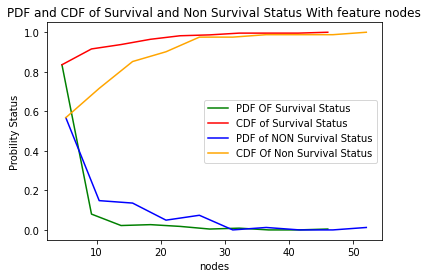

In [40]:
PDFandCDFWithClassLabel(haberman_dataframe,'nodes')

# Observation
Almost 80% of the survived patients have less than or equal to 5 positive lymph nodes.so Postive Lymph Node is One of the Most Important Feature to Build a model

PDF of Survival Status with feature year is : [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
Cumulativ Sum for Survived People with feature year : [0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
PDFfor non-survival People with feature year  : [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
Cumulativ Sum for Non Survived People with feature year: [0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]


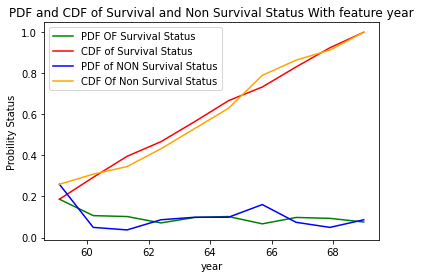

In [41]:
PDFandCDFWithClassLabel(haberman_dataframe,'year')

# Observation

From the above plot Green line indicates the PDF of the Patient Suvived and Red line Indicates the CDF of the patient survived

Blue line indicates the PDF of the Patient whose not Suvived more than five years and orange line Indicates the CDF of the patient whose not survived more than five years


# Box Plot

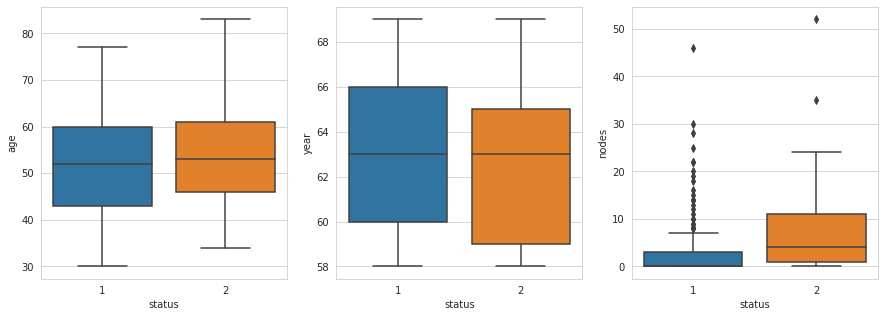

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.boxplot( x='status', y=feature, 
                    data=df, ax=axes[idx])
plt.show()

We Observe more no fo people survived in 42- 52 age (25% of people survived more than five year in this range)

# Violin Plot

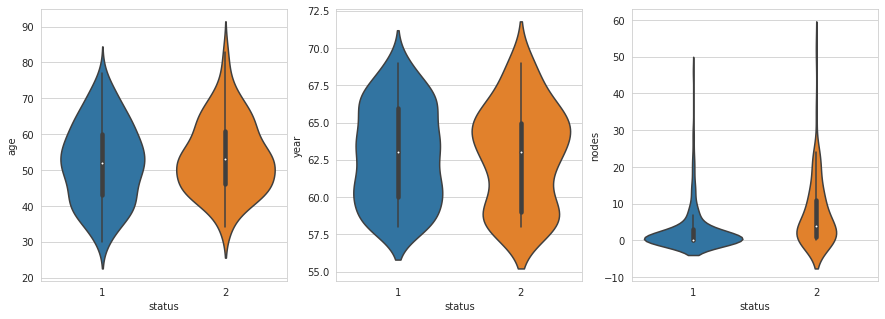

In [103]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.violinplot( x='status', y=feature, 
                    data=df, ax=axes[idx])
plt.show()

1.we can Observe the 3rd subplot says More no of people are survived only affected less than 5 positive lymph node ,as we saw the orange plot the patient whose not survied has affect more potive lymph node, as per understanding if the a patient affected more lymph postive node chance of survival is more than five is too low

2.During the Year of Operation 62 to 65 Most the Operation were unsuccessfull

## Multivarient Analysis

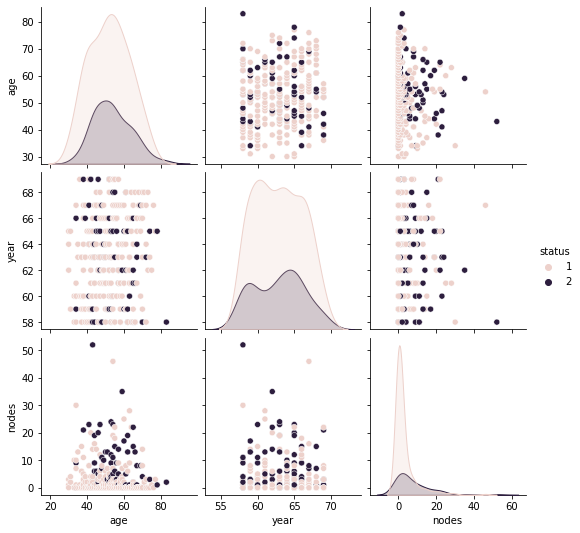

In [45]:
sns.pairplot(haberman_dataframe,hue= 'status')
plt.show()

# Observation

 We can Observe Node and Year Relationship Likely said More Spread has Successful Operation of the Patient were affected a 0 Positive Auxillary Nodes

In [58]:
#Bivarient Analysis
#relationShip Between Age and Year
def bivarientAnalysisSctterPlot(data,column1,column2):
  #firstparam - dataset
  #secondparam - columnName
  #thirdparaa, - columnName
    sns.set_style('whitegrid')
    title = "RelationShip Between {0} and {1}".format(column1 , column2)
    x_axis = column1
    y_axis = column2
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.scatter(data[column1] ,data[column2])
   
    plt.show()


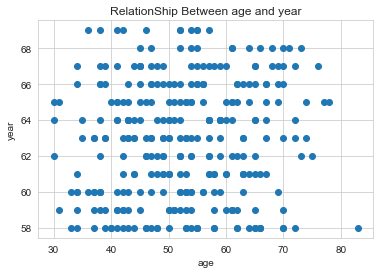

In [59]:
bivarientAnalysisSctterPlot(haberman_dataframe, 'age' , 'year')

# Conclution 

1.Patient’s age and operation year alone are not deciding factors survival. People less than 35 years have more chance of survival.

2.Node is the Important Feature to deciding the Patient Survival. People less no of Positive node have More Chance of Survival
If the People whose age is less than 35 with less positive node have survival percentage is more.

3.Our Main Objective is to classify the Survival status of a New Patient Based on the Features. if the Patient has a More Positive node with age 50-60, the chance of Survival is less. It is difficult to predict data Because the Data is too imbalanced
